In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install pygal
!pip3 install cairosvg
import pygal
import statsmodels.api as sm
import matplotlib.image as image
from wordcloud import WordCloud
from google.colab import drive
from scipy.stats import ttest_ind
from scipy.stats import zscore
from datetime import datetime
from statsmodels.stats.weightstats import ttest_ind
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [64]:
import warnings
warnings.filterwarnings('ignore')

### Extraxcting Data

In [65]:
drive.mount('/content/drive')
path='/content/drive/MyDrive/matches.csv'
data=pd.read_csv(path)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,match_id,team1,team2,score_team1,score_team2,wickets_team1,wickets_team2,team1_away_or_home,team2_home_away,winner,...,player_of_match,player_of_match_team,venue,toss,toss_decision,ball_remaining,ground,ground_city,ground_country,match_date
0,ODI # 1028,West Indies,Australia,172,173,9,9,away,home,Australia,...,Paul Reiffel,Australia,Sydney Cricket Ground,West Indies,bat first,NaN,Sydney,Moore Park,Australia,"Jan 1, 1996"
1,ODI # 1029,West Indies,Sri Lanka,194,124,10,10,away,away,West Indies,...,Shivnarine Chanderpaul,West Indies,"Bellerive Oval, Hobart",Sri Lanka,field first,NaN,Hobart,Bellerive,Australia,"Jan 3, 1996"
2,ODI # 1030,Sri Lanka,West Indies,102,104,10,3,away,away,West Indies,...,Curtly Ambrose,West Indies,"Brisbane Cricket Ground, Woolloongabba, Brisbane",Sri Lanka,bat first,with 143 balls remaining),Brisbane,Woolloongabba,Australia,"Jan 5, 1996"
3,ODI # 1031,West Indies,Australia,231,217,10,10,away,home,West Indies,...,Ottis Gibson,West Indies,"Brisbane Cricket Ground, Woolloongabba, Brisbane",Australia,field first,NaN,Brisbane,Woolloongabba,Australia,"Jan 7, 1996"
4,ODI # 1032,Australia,Sri Lanka,213,214,5,7,home,away,Sri Lanka,...,Romesh Kaluwitharana,Sri Lanka,Melbourne Cricket Ground,Australia,bat first,with 15 balls remaining),Melbourne,Jolimont,Australia,"Jan 9, 1996"


In [66]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              1237 non-null   object 
 1   team1                 1237 non-null   object 
 2   team2                 1237 non-null   object 
 3   score_team1           1237 non-null   int64  
 4   score_team2           1237 non-null   int64  
 5   wickets_team1         1237 non-null   int64  
 6   wickets_team2         1237 non-null   int64  
 7   team1_away_or_home    1237 non-null   object 
 8   team2_home_away       1237 non-null   object 
 9   winner                1237 non-null   object 
 10  margin                1221 non-null   float64
 11  margin_type           1222 non-null   object 
 12  time_of_day           1237 non-null   object 
 13  series                1231 non-null   object 
 14  player_of_match       1237 non-null   object 
 15  player_of_match_team 

In [67]:
data['ball_remaining']=data['ball_remaining'].fillna('0')
data['margin']=data['margin'].fillna('0')
data['margin_type']=data['margin_type'].fillna('default')
data['series']=data['series'].fillna('NatWest Series')

In [68]:
data.isnull().sum()

match_id                0
team1                   0
team2                   0
score_team1             0
score_team2             0
wickets_team1           0
wickets_team2           0
team1_away_or_home      0
team2_home_away         0
winner                  0
margin                  0
margin_type             0
time_of_day             0
series                  0
player_of_match         0
player_of_match_team    0
venue                   0
toss                    0
toss_decision           0
ball_remaining          0
ground                  0
ground_city             0
ground_country          0
match_date              0
dtype: int64

In [69]:
data['match_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1237 entries, 0 to 1236
Series name: match_date
Non-Null Count  Dtype 
--------------  ----- 
1237 non-null   object
dtypes: object(1)
memory usage: 9.8+ KB


In [70]:
data['match_date'] = pd.to_datetime(data['match_date'], format='%b %d, %Y')
data['match_date'] = data['match_date'].dt.strftime('%d/%m/%Y')

In [71]:
data = data[data['winner'] != 'No result']

In [72]:
data.shape

(1235, 24)

In [73]:
top_5_pom=data['player_of_match'].value_counts().head(5)
top_5_pom = top_5_pom.sort_values()
top_5_pom

Ricky Ponting        21
Jacques Kallis       24
Sourav Ganguly       30
Sanath Jayasuriya    33
Sachin Tendulkar     39
Name: player_of_match, dtype: int64

In [74]:
top_5_pom.keys()

Index(['Ricky Ponting', 'Jacques Kallis', 'Sourav Ganguly',
       'Sanath Jayasuriya', 'Sachin Tendulkar'],
      dtype='object')

In [75]:
def pom_country(data, year, team):
  top_5=data[data]

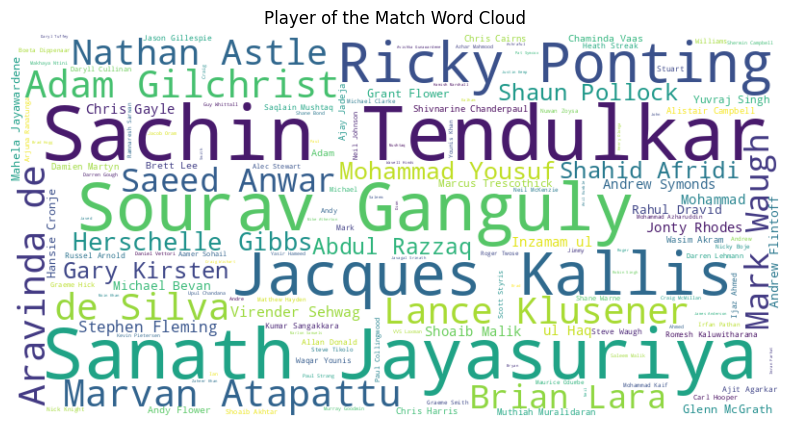

In [76]:
player_of_match_text = ' '.join(data['player_of_match'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(player_of_match_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Player of the Match Word Cloud')
plt.show()


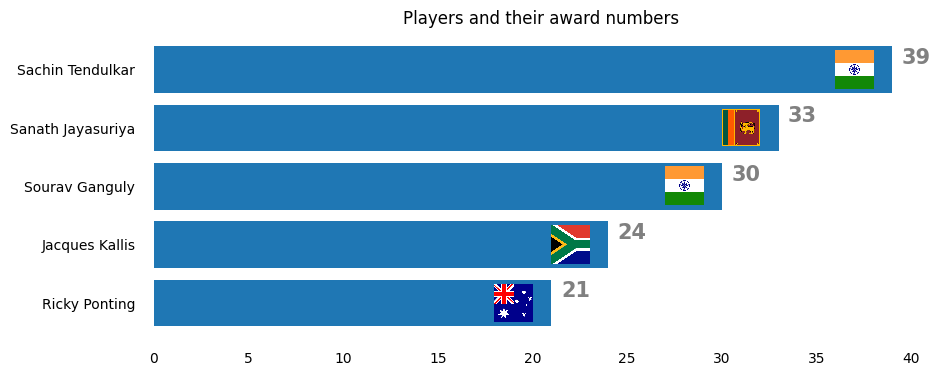

In [77]:
# Adding country flags

image_ = image.imread("/content/drive/MyDrive/in.png")
imagebox = OffsetImage(image_, zoom = 0.03)
ab = AnnotationBbox(imagebox, (28, 2), frameon = False)
ab1 = AnnotationBbox(imagebox, (37, 4), frameon = False)


imagebox = OffsetImage(image.imread("/content/drive/MyDrive/lk.png"), zoom = 0.03)
ab2 = AnnotationBbox(imagebox, (31, 3), frameon = False)

imagebox = OffsetImage(image.imread("/content/drive/MyDrive/za.png"), zoom = 0.03)
ab3 = AnnotationBbox(imagebox, (22, 1), frameon = False)


imagebox = OffsetImage(image.imread("/content/drive/MyDrive/au.png"), zoom = 0.03)
ab4 = AnnotationBbox(imagebox, (19, 0), frameon = False)


# Figure Size
fig, ax = plt.subplots(figsize =(10, 4))

# Horizontal Bar Plot
ax.barh(top_5_pom.keys(), top_5_pom.values)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.5, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 15, fontweight ='bold',
			color ='grey')

ax.set_title('Players and their award numbers', loc ='center', )
ax.add_artist(ab)
ax.add_artist(ab1)
ax.add_artist(ab2)
ax.add_artist(ab3)
ax.add_artist(ab4)

plt.show()

In [78]:
df = dict(country=data.winner.value_counts().keys(),
    value=data.winner.value_counts().values)

# Create a choropleth map
fig = px.choropleth(df, locations='country', locationmode='country names', color='value', projection='equirectangular')

# Show the map

fig.update_layout(title_text='Number of matches won by countries playing ODIs between 1996 and 2005', title_x=0.5)
fig.show()


In [79]:
countries_dict = {}
for country in data['team1'].unique():
  countries_dict[country] = data[data['team1']==country].score_team1.tolist()

countries_dict1 = {}
for country in data['team2'].unique():
  countries_dict1[country] = data[data['team2']==country].score_team2.tolist()

# Merging dictionaries
merged_dict = {}

# Merge values for common keys
for key in set(countries_dict.keys()).union(countries_dict1.keys()):
    merged_dict[key] = countries_dict.get(key, []) + countries_dict1.get(key, [])

print(merged_dict)

{'Pakistan': [242, 281, 215, 271, 188, 225, 170, 258, 213, 371, 203, 264, 160, 228, 277, 234, 223, 176, 197, 149, 257, 181, 187, 151, 214, 289, 327, 319, 116, 159, 265, 280, 212, 314, 249, 250, 145, 114, 189, 246, 257, 316, 217, 315, 211, 302, 293, 246, 278, 291, 323, 279, 205, 229, 261, 275, 269, 220, 271, 132, 230, 222, 260, 196, 239, 255, 211, 184, 176, 262, 261, 154, 146, 196, 272, 168, 263, 197, 320, 295, 277, 164, 240, 153, 191, 227, 252, 304, 135, 243, 285, 255, 278, 273, 257, 242, 290, 152, 176, 279, 261, 202, 281, 232, 288, 295, 275, 278, 176, 256, 279, 117, 200, 302, 344, 323, 300, 335, 213, 255, 253, 273, 278, 286, 199, 116, 203, 198, 185, 229, 323, 243, 257, 302, 277, 267, 243, 157, 192, 281, 314, 277, 229, 255, 126, 329, 293, 257, 343, 122, 300, 192, 131, 292, 272, 163, 307, 319, 303, 192, 258, 303, 353, 210, 112, 151, 250, 248, 315, 190, 171, 277, 185, 247, 266, 136, 259, 149, 239, 196, 131, 198, 193, 196, 203, 183, 224, 200, 263, 224, 224, 224, 188, 148, 251, 171, 219, 2

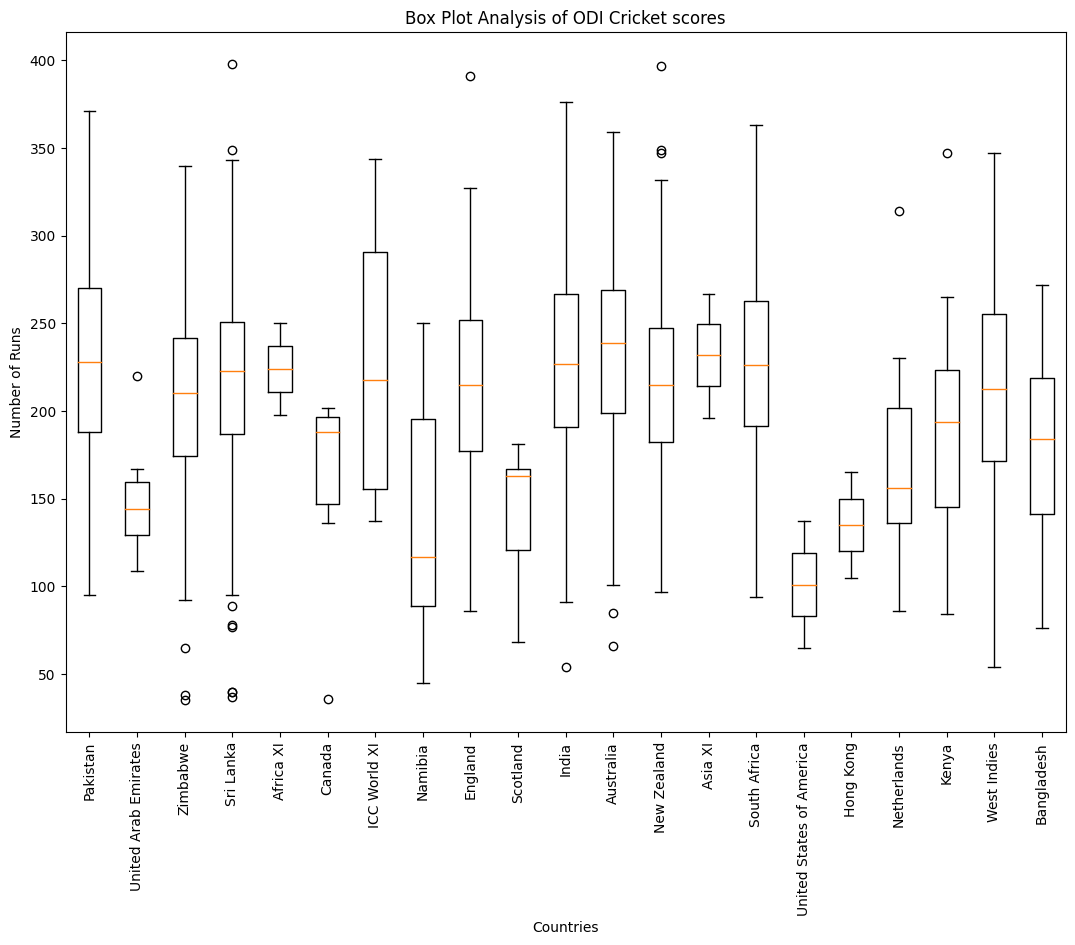

In [80]:
# Countries Scores boxplot

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

list_ = []

for i in merged_dict.values():
  list_.append(i)

ax.boxplot(list_)

plt.xticks(range(1, 22), merged_dict.keys(), rotation=90)
plt.title('Box Plot Analysis of ODI Cricket scores')
plt.xlabel('Countries')
plt.ylabel('Number of Runs')
plt.show()

In [81]:
data.columns

Index(['match_id', 'team1', 'team2', 'score_team1', 'score_team2',
       'wickets_team1', 'wickets_team2', 'team1_away_or_home',
       'team2_home_away', 'winner', 'margin', 'margin_type', 'time_of_day',
       'series', 'player_of_match', 'player_of_match_team', 'venue', 'toss',
       'toss_decision', 'ball_remaining', 'ground', 'ground_city',
       'ground_country', 'match_date'],
      dtype='object')

In [82]:
coun_toss_wins = pd.DataFrame(data['toss'].value_counts()).reset_index()
coun_toss_wins.rename(columns={'index': 'toss', 'toss':'count of toss wins'}, inplace=True)
#coun_toss_wins

In [83]:
toss_country_decision = data.groupby(['toss', 'toss_decision']).size()
toss_country_decision = pd.DataFrame(toss_country_decision).reset_index()
toss_country_decision = toss_country_decision[toss_country_decision['toss_decision']=='bat first']
toss_country_decision.rename(columns={0: 'Count of bat_first'}, inplace=True)
#toss_country_decision

In [84]:
merged_pd = pd.merge(coun_toss_wins, toss_country_decision, how="outer", on="toss")
merged_pd = merged_pd.dropna()

In [85]:
merged_pd['Percent of times batting chosen'] = merged_pd['Count of bat_first']*100/merged_pd['count of toss wins']
# del merged_pd['No of times batting chosen']
merged_pd = merged_pd[merged_pd['count of toss wins'] >= 10]
merged_pd

,toss,count of toss wins,toss_decision,Count of bat_first,Percent of times batting chosen
0,India,172,bat first,96.0,55.813953
1,Pakistan,164,bat first,113.0,68.902439
2,South Africa,136,bat first,81.0,59.558824
3,Australia,134,bat first,93.0,69.402985
4,Sri Lanka,132,bat first,67.0,50.757576
5,New Zealand,109,bat first,59.0,54.128440
6,Zimbabwe,106,bat first,63.0,59.433962
7,West Indies,95,bat first,47.0,49.473684
8,England,92,bat first,52.0,56.521739
9,Bangladesh,42,bat first,31.0,73.809524


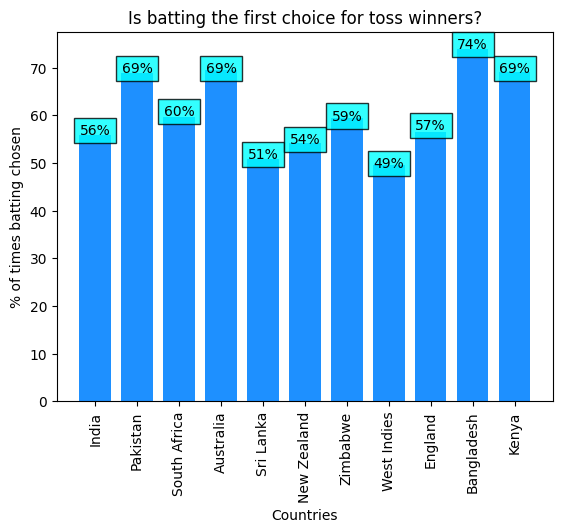

In [86]:
plt.bar(merged_pd['toss'], merged_pd['Percent of times batting chosen'], width = 0.75, color=['dodgerblue'])
plt.xticks(merged_pd['toss'], rotation='vertical')
plt.xlabel('Countries')
plt.ylabel('% of times batting chosen')
plt.title('Is batting the first choice for toss winners?')

def valuelabel(weight,students):
    for i in range(len(weight)):
        plt.text(i,round(students[i]),f"{round(students[i])}%", ha = 'center',
                 bbox = dict(facecolor = 'cyan', alpha =0.8))

valuelabel(merged_pd['toss'], merged_pd['Percent of times batting chosen'])

plt.show()

In [87]:
ser_summary = pd.DataFrame(data['series'].value_counts()).reset_index()
ser_summary = ser_summary[ser_summary['series']>=15]
ser_summary

,index,series
0,ICC World Cup,91
1,Carlton & United Series,58
2,NatWest Series,52
3,VB Series,51
4,Wills World Cup,34
5,ICC Champions Trophy,29
6,Coca-Cola Cup,21
7,Coca-Cola Champions Trophy,21
8,Asia Cup,20
9,Standard Bank International One-Day Series,20


In [88]:
series_wise_perf = pd.DataFrame(data.groupby(['series', 'winner']).size()).reset_index().sort_values('series')
series_wise_perf.rename(columns={0: 'Count of wins_series'}, inplace=True)
series_wise_perf = series_wise_perf[series_wise_perf['series'].isin(ser_summary['index'])]
series_wise_perf

,series,winner,Count of wins_series
11,Asia Cup,Bangladesh,1
12,Asia Cup,India,4
13,Asia Cup,Pakistan,8
14,Asia Cup,Sri Lanka,7
21,Australia tour of New Zealand,New Zealand,4
...,...,...,...
331,Wills World Cup,Kenya,1
330,Wills World Cup,India,4
329,Wills World Cup,England,2
328,Wills World Cup,Australia,4


In [89]:
# Pivot the DataFrame
pivot_df = series_wise_perf.pivot(index='series', columns='winner', values='Count of wins_series')

# Reset index to make 'series' a regular column
pivot_df.reset_index(inplace=True)

# Display the pivoted DataFrame

pivot_df=pivot_df.fillna(0)
pivot_df.head()

winner,series,Australia,Bangladesh,Canada,England,India,Kenya,Match tied,Match tied (D/L method),Netherlands,New Zealand,Pakistan,Pakistan awarded the match (opposition conceded),South Africa,Sri Lanka,U.A.E.,West Indies,Zimbabwe
0,Asia Cup,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,7.0,0.0,0.0,0.0
1,Australia tour of New Zealand,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Australia tour of South Africa,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
3,Carlton & United Series,26.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,8.0,3.0,0.0,5.0,0.0
4,Coca-Cola Champions Trophy,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,0.0,1.0,3.0


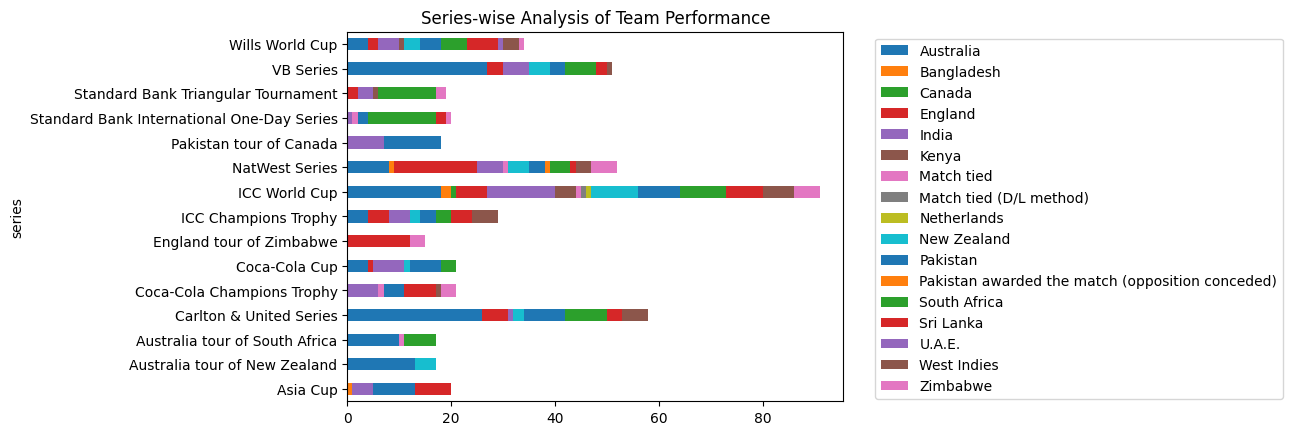

In [90]:
pivot_df.plot(
    x = 'series',
    kind = 'barh',
    stacked = True,
    title = 'Series-wise Analysis of Team Performance',
    mark_right = True)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


In [91]:
ind_scores = data[(data['team1']=='India')]

ind_scores['away_neutral'] = ind_scores.apply(lambda x : x['team1_away_or_home'] if x['team1_away_or_home'] != x['team2_home_away'] else 'neutral',axis=1)


ind_scores_mean= ind_scores[['team2', 'score_team1','away_neutral']].groupby(['team2','away_neutral']).agg(mean_score = ('score_team1','mean'),
                                                                           count_of_matches = ('score_team1','count')).reset_index()



In [92]:
ind_scores_mean.sort_values(['team2','away_neutral'],ascending=False)


,team2,away_neutral,mean_score,count_of_matches
29,Zimbabwe,neutral,260.857143,7
28,Zimbabwe,home,282.900000,10
27,Zimbabwe,away,216.333333,3
26,West Indies,neutral,245.750000,4
25,West Indies,home,284.000000,3
24,West Indies,away,190.250000,4
23,United Arab Emirates,neutral,260.000000,1
22,Sri Lanka,neutral,261.833333,6
21,Sri Lanka,home,276.000000,7
20,Sri Lanka,away,241.909091,11


In [93]:
ind_scores_mean = ind_scores_mean[ind_scores_mean['count_of_matches']> 5 ]

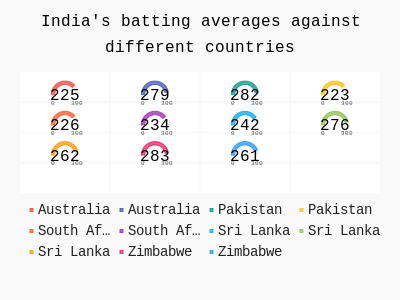

In [94]:
# creating the chart object
Solid_Gauge = pygal.SolidGauge(inner_radius = 0.75,
                               half_pie = True,
                               height = 300,
                               width=400)

# naming the title
Solid_Gauge.title = "India's batting averages against different countries"

# Random data
max_value = 300

for value, label in zip(ind_scores_mean['mean_score'], ind_scores_mean['team2']):
  Solid_Gauge.add(label, [{'value': round(value), 'max_value': max_value}])

Solid_Gauge.legend_at_bottom = True  # Move the legend to the bottom
Solid_Gauge.show_legend = True  # Show the legend
Solid_Gauge.legend_box_size = 3  # Set the size of the legend box
Solid_Gauge.legend_font_size = 2  # Set the font size of the legend text
Solid_Gauge.label_font_size = 0.5

Solid_Gauge

In [95]:
A = ['run', 'runs']
country_margin = data[data['margin_type'].isin(A)]

country_margin = country_margin[['team1', 'team2', 'score_team1', 'score_team2', 'wickets_team1', 'wickets_team2', 'winner', 'margin', 'margin_type', 'match_date']]

country_margin['winner_score']=country_margin['score_team1'].astype(str) + "/" + country_margin['wickets_team1'].astype(str)
country_margin['opponent_score']=country_margin['score_team2'].astype(str) + "/" + country_margin['wickets_team2'].astype(str)


country_margin.head()
country_margin = country_margin.sort_values(by=['winner', 'margin']).drop_duplicates(subset='winner', keep='first').drop(['team1', 'score_team1', 'score_team2', 'wickets_team1', 'wickets_team2', 'margin_type'], axis=1)
# country_margin[country_margin['winner']=='Australia'  'India']]
# country_margin['winner'].unique()

countries = ['Australia', 'Bangladesh', 'England', 'India', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka',
       'West Indies', 'Zimbabwe']
country_margin = country_margin[country_margin['winner'].isin(countries)].reset_index()
country_margin

,index,team2,winner,margin,match_date,winner_score,opponent_score
0,632,Zimbabwe,Australia,1.0,04/02/2001,302/5,301/6
1,1045,Zimbabwe,Bangladesh,8.0,10/03/2004,238/7,230/9
2,749,India,England,2.0,31/01/2002,271/5,269/8
3,1024,Zimbabwe,India,3.0,24/01/2004,280/7,277/6
4,256,Zimbabwe,New Zealand,2.0,08/03/1998,231/9,229/9
5,671,England,Pakistan,2.0,12/06/2001,242/8,240/10
6,219,New Zealand,South Africa,1.0,11/12/1997,174/9,173/7
7,1038,Australia,Sri Lanka,1.0,22/02/2004,245/10,244/5
8,568,England,West Indies,3.0,20/07/2000,195/9,192/10
9,254,New Zealand,Zimbabwe,1.0,04/03/1998,228/7,227/9


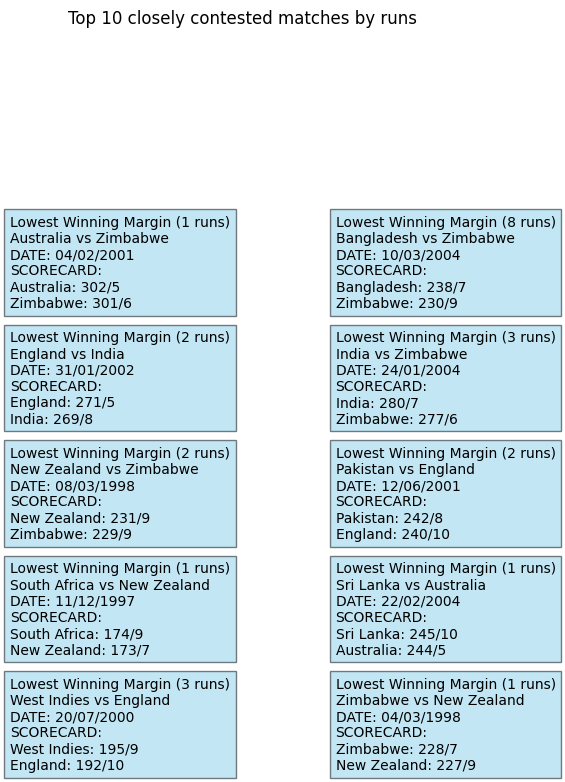

In [96]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 3))

# Set grid dimensions
rows, cols = 5, 2

# Loop through the DataFrame and annotate each box
for i, row in country_margin.iterrows():
    text = f"Lowest Winning Margin ({round(row['margin'])} runs)\n{row['winner']} vs {row['team2']}\nDATE: {row['match_date']}\nSCORECARD:\n{row['winner']}: {row['winner_score']}\n{row['team2']}: {row['opponent_score']}"

    # Calculate grid position
    row_pos, col_pos = divmod(i, cols)

    # Plot the text annotation
    ax.text(col_pos * 0.7, -row_pos * 0.5, text, ha='left', va='center', bbox=dict(facecolor='skyblue', alpha=0.5))

# Set axis labels and title
ax.set_axis_off()
plt.title('Top 10 closely contested matches by runs')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [97]:
B = ['wicket', 'wickets']
country_margin_wkts = data[data['margin_type'].isin(B)]

country_margin_wkts = country_margin_wkts[['team1', 'team2', 'score_team1', 'score_team2', 'wickets_team1', 'wickets_team2', 'winner', 'margin', 'margin_type', 'match_date']]

country_margin_wkts['winner_score']=country_margin_wkts['score_team2'].astype(str) + "/" + country_margin_wkts['wickets_team2'].astype(str)
country_margin_wkts['opponent_score']=country_margin_wkts['score_team1'].astype(str) + "/" + country_margin_wkts['wickets_team1'].astype(str)


country_margin_wkts.head()
country_margin_wkts = country_margin_wkts.sort_values(by=['winner', 'margin']).drop_duplicates(subset='winner', keep='last').drop(['team2', 'score_team1', 'score_team2', 'wickets_team1', 'wickets_team2', 'margin_type'], axis=1)

country_margin_wkts = country_margin_wkts[country_margin_wkts['winner'].isin(countries)].reset_index()
country_margin_wkts

,index,team1,winner,margin,match_date,winner_score,opponent_score
0,1183,Bangladesh,Australia,10.0,25/06/2005,140/0,139/10
1,1147,Zimbabwe,Bangladesh,8.0,31/01/2005,202/2,198/10
2,1178,Bangladesh,England,10.0,16/06/2005,192/0,190/10
3,707,Kenya,India,10.0,12/10/2001,91/0,90/10
4,897,South Africa,New Zealand,9.0,16/02/2003,229/1,306/6
5,829,Netherlands,Pakistan,9.0,21/09/2002,142/1,136/10
6,1226,India,South Africa,10.0,25/11/2005,189/0,188/10
7,1083,Bangladesh,Sri Lanka,10.0,23/07/2004,191/0,190/9
8,167,India,West Indies,10.0,03/05/1997,200/0,199/7
9,862,Kenya,Zimbabwe,9.0,15/12/2002,136/1,133/10


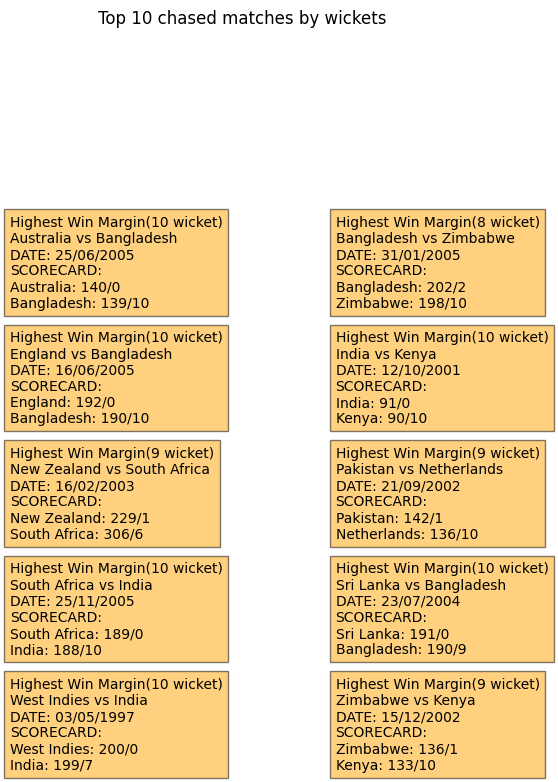

In [98]:
# Create a figure and axis
fig1, ax1 = plt.subplots(figsize=(6, 3))

# Set grid dimensions
rows, cols = 5, 2

# Loop through the DataFrame and annotate each box
for i, row in country_margin_wkts.iterrows():
    text = f"Highest Win Margin({round(row['margin'])} wicket)\n{row['winner']} vs {row['team1']}\nDATE: {row['match_date']}\nSCORECARD:\n{row['winner']}: {row['winner_score']}\n{row['team1']}: {row['opponent_score']}"

    # Calculate grid position
    row_pos, col_pos = divmod(i, cols)

    # Plot the text annotation
    ax1.text(col_pos * 0.7, -row_pos * 0.5, text, ha='left', va='center', bbox=dict(facecolor='orange', alpha=0.5))

# Set axis labels and title
ax1.set_axis_off()
plt.title('Top 10 chased matches by wickets')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Hypothesis testing

1) Does India's batting average exhibit a notable difference when playing against Pakistan compared to its batting average against South Africa?

Two sample mean test

Null hypothesis :The batting average of India against Pakistan equals the batting average of India against South Africa.

Alternate hypothesis : The batting average of India against Pakistan is not equal to the batting average of India against South Africa.

We set the significance level ($ \alpha $) to 0.05

In [99]:
data['India_bat_first'] = np.where((data["team1"] == "India"),1,0)

In [100]:
data['India_bat_first'].value_counts()

0    1080
1     155
Name: India_bat_first, dtype: int64

Focusing on India's batting average, we specifically included matches where India batted first. This approach was chosen because, in cases where India bats second, the team only needs to match the opponent's score, which doesn't accurately reflect the true batting average potential.


In [101]:
data_ind = data[data['India_bat_first'] == 1]

In [102]:
data_ind_sa = data_ind[data_ind['team2'] == 'South Africa']
data_ind_pak = data_ind[data_ind['team2'] == 'Pakistan']

In [103]:
data_ind_sa.shape, data_ind_pak.shape

((19, 25), (28, 25))

After filtering the matches as suggested before, the sample size became small and we ended up with less than 30 matches for both India vs Pakistan and India vs South Africa. Hence we couldn't proceed with z-test.
We tried to check for the normality of the data to be able to use t-test.

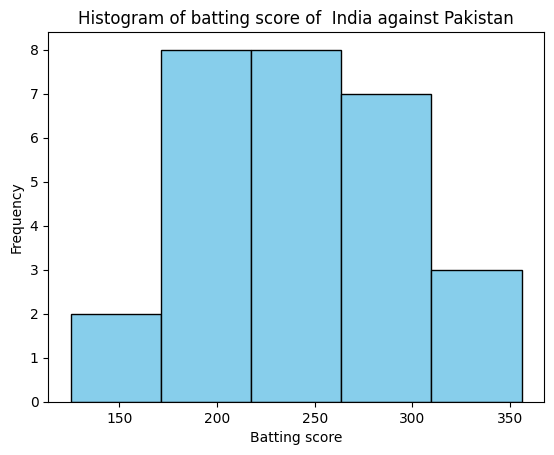

In [104]:
import matplotlib.pyplot as plt
import numpy as np


# Plotting a basic histogram
plt.hist(data_ind_pak['score_team1'], bins=5, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Batting score')
plt.ylabel('Frequency')
plt.title('Histogram of batting score of  India against Pakistan')

# Display the plot
plt.show()

Checking for spread of data by looking `mean - min` and `max- mean` and its relation with `sd`

Checking normality for India - Pakistan matches

In [105]:
(data_ind_pak['score_team1'].mean() - data_ind_pak['score_team1'].min())/data_ind_pak['score_team1'].std()

2.175580653672338

In [106]:
(data_ind_pak['score_team1'].max() - data_ind_pak['score_team1'].mean() )/data_ind_pak['score_team1'].std()

2.066703237781591

Checking the normality in similar fashion for India - South Africa matches

In [107]:
(data_ind_sa['score_team1'].mean() - data_ind_sa['score_team1'].min())/data_ind_sa['score_team1'].std()

1.4804645892428698

In [108]:
(data_ind_sa['score_team1'].max() - data_ind_sa['score_team1'].mean() )/data_ind_sa['score_team1'].std()

1.8139025597930651

The data seems more or less symmetric around mean and isn't too spread, hence we can assume it to be normal.

Hence we are proceeding with t-statistic to perform hypothesis testing.

In [109]:
t_statistic, p_value,dof = ttest_ind(data_ind_pak['score_team1'], data_ind_sa['score_team1'],usevar ='unequal',alternative='two-sided' ,value=0)
print(f'p_value of the hypothesis test is {p_value}')
significance_level = 0.05

if p_value < significance_level:
  print('Hypothesis can be rejected')
else:
  print('We fail to reject hypothesis')

p_value of the hypothesis test is 0.29427550452681606
We fail to reject hypothesis


We fail to reject the hypothesis that there is no significant difference between india's score against pakistan vs india's score against south africa

2) Is there an increased likelihood of winning the match for teams that win the toss?

Two sample proportion test

Null hypothesis : The ratio of matches won and the toss won to the total number of matches where the toss was won is the same as the ratio of matches won and the toss lost to the total number of matches where the toss was lost.

Alternate hypothesis : The ratio of matches won and the toss won to the total number of matches where the toss was won is larger than the ratio of matches won and the toss lost to the total number of matches where the toss was lost.
We set the significance level ($ \alpha $) to 0.05

In [110]:
data["team1_won_toss"] = np.where(data["team1"] == data["toss"],1,0)
data["team1_won_match"] = np.where(data["team1"] == data["winner"],1,0)

In [111]:
data["team1_won_toss"].value_counts()

1    731
0    504
Name: team1_won_toss, dtype: int64

In [112]:
data["team1_won_match"].value_counts()

0    629
1    606
Name: team1_won_match, dtype: int64

In [113]:
pd.crosstab(data["team1_won_toss"], data["team1_won_match"])

team1_won_match,0,1
team1_won_toss,,
0,261,243
1,368,363


In [114]:
#nobs = np.array(["no of times team1 won toss","no of times team1 lost toss"])
nobs = np.array([data["team1_won_toss"].value_counts()[1], data["team1_won_toss"].value_counts()[0]])

#counts = np.array(["no of times team1 won toss and won match","no of times team1 lost toss and won match"])
counts = np.array([data[(data['team1_won_toss'] == 1) & (data['team1_won_match']==1)].shape[0], data[(data['team1_won_toss'] == 0) & (data['team1_won_match']==1)].shape[0]])

In [115]:
z_statistic, p_value = sm.stats.proportions_ztest(counts, nobs, value=0, alternative='larger', prop_var=False)
print(f'p_value of the hypothesis test is {p_value}')
significance_level = 0.05

if p_value < significance_level:
  print('Hypothesis can be rejected')
else:
  print('We fail to reject hypothesis')

p_value of the hypothesis test is 0.30895956407243697
We fail to reject hypothesis


Conclusion : We fail to reject the hypothesis that there is no significant difference between no.of matches won irrespective of winning toss.

3) Is there a variance in a country's likelihood of winning when playing at a neutral ground (a location not belonging to either of the participating countries) compared to playing at the home ground of the opponent's country?

Null hypothesis :  The proportion of matches won by a country on neutral ground is equal to the proportion of matches won on the opponent's home ground.

Alternate hypothesis : The proportion of matches won by a country on neutral ground is greater than the proportion of matches won on the opponent's home ground.

We set the significance level ($ \alpha $) to 0.05


In [116]:
def check_hypothesis(country,alpha):

  neutral = data[((data['team1_away_or_home'] == 'away') & (data['team2_home_away'] == 'away')) & ((data['team1'] == country) | (data['team1'] == country))]
  non_neutral = data[~((data['team1_away_or_home'] == 'away') & (data['team2_home_away'] == 'away'))]
  data_country_away = non_neutral[((non_neutral['team1'] == country) & (non_neutral['team1_away_or_home'] == 'away')) | ((non_neutral['team2'] == country) & (non_neutral['team2_home_away'] == 'away'))]
  neutral_won = neutral[neutral['winner'] == country]
  away_won = data_country_away[data_country_away['winner'] == country]

  counts = [neutral_won.shape[0], away_won.shape[0]]
  nobs = [neutral.shape[0], data_country_away.shape[0]]
  print(counts)
  print(nobs)

  _,p_value = sm.stats.proportions_ztest(counts, nobs, value=0, alternative='larger', prop_var=False)

  if p_value < alpha:
    print(f"We can reject null hypothesis, since {p_value} is < {alpha}")
  else:
    print(f"We fail to reject null hypothesis, since {p_value} is > {alpha}")


We tested the above hypothesis for 4 different countries by running 4 hypothesis tests.

In [117]:
countries = ['India','England','Zimbabwe','New Zealand']

In [118]:
for country in countries:
  print(country)
  check_hypothesis(country,0.05)

India
[36, 38]
[61, 92]
We can reject null hypothesis, since 0.01591400000524706 is < 0.05
England
[11, 32]
[17, 85]
We can reject null hypothesis, since 0.019582624321359543 is < 0.05
Zimbabwe
[13, 23]
[41, 80]
We fail to reject null hypothesis, since 0.3681353854128222 is > 0.05
New Zealand
[17, 22]
[39, 68]
We fail to reject null hypothesis, since 0.12254790471222815 is > 0.05


For 2 of the countries we were able to reject hypothesis, that is India and England have higher chance of winning while playing at a neutral ground when compared to playing at opponent's home country.

For Zimbabwe and New Zealed we failed to reject the null hypothesis that they have equal chance of winning in both neutral ground and opponent's home country.